In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D,Conv2D
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling1D,MaxPooling2D
import tensorflow
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
df= pd.read_csv("C:/Users/RAHAT/Downloads/Untitled Folder/Sales_f/data/Splited Data s-1 to s-5/STEST/S_1__I_582865.csv",parse_dates=['date'],index_col='date')

#convert date field from string to datetime
#df['date'] = pd.to_datetime(df['date'])

In [3]:
df.drop(['id','store_nbr','item_nbr','onpromotion'], axis=1,inplace=True)

In [4]:
df_1=df[0:300]
df_1=df_1.astype('float32')
scaler = MinMaxScaler(feature_range=(-1,1))
ts = scaler.fit_transform(df_1)

In [11]:
timestep =int(len(df_1) * 0.08)
print(timestep)
X= []
Y=[]

raw_data=ts

for i in range(len(raw_data)- (timestep)):
    X.append(raw_data[i:i+timestep])
    Y.append(raw_data[i+timestep])

print(np.shape(np.array(X)))
X=np.asanyarray(X)
Y=np.asanyarray(Y)


24
(276, 24, 1)


In [8]:
X.shape

(276, 24, 1)

In [6]:
k = int(len(X) * 0.8)
Xtrain = X[:k,:,:]  
Ytrain = Y[:k]   

In [7]:
Ytrain.shape

(220, 1)

In [8]:
Xtrain.shape

(220, 24, 1)

In [9]:
Xtrain

array([[[ 0.9341191 ],
        [-0.8028615 ],
        [-0.00306332],
        ...,
        [ 0.39885402],
        [-0.03412974],
        [ 0.10224533]],

       [[-0.8028615 ],
        [-0.00306332],
        [ 0.08840609],
        ...,
        [-0.03412974],
        [ 0.10224533],
        [ 0.26644325]],

       [[-0.00306332],
        [ 0.08840609],
        [-0.4728799 ],
        ...,
        [ 0.10224533],
        [ 0.26644325],
        [-0.4068547 ]],

       ...,

       [[-0.19162422],
        [-0.44570577],
        [-0.23681831],
        ...,
        [ 0.24496353],
        [-0.43792117],
        [ 0.06591713]],

       [[-0.44570577],
        [-0.23681831],
        [-0.59851515],
        ...,
        [-0.43792117],
        [ 0.06591713],
        [ 0.11521971]],

       [[-0.23681831],
        [-0.59851515],
        [-0.6578368 ],
        ...,
        [ 0.06591713],
        [ 0.11521971],
        [-0.5853965 ]]], dtype=float32)

In [10]:
Ytrain.shape

(220, 1)

In [11]:
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(int(len(df_1) * 0.08), 1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain,batch_size=30, epochs=200, verbose=0)

In [9]:
Xtest = X[k:,:,:]  
Ytest= Y[k:] 
Xtest.shape

(56, 24, 1)

In [10]:
preds = model.predict(Xtest)
preds = scaler.inverse_transform(preds)

In [11]:
preds.shape

(56, 1)

In [51]:

Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 
Ytest = scaler.inverse_transform(Ytest)
Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 
Ytrain = scaler.inverse_transform(Ytrain)
np.sqrt(mean_squared_error(Ytest,preds))

5.133218

In [28]:
preds[16:]

array([[16.562193 ],
       [14.999523 ],
       [16.905703 ],
       [13.8314705],
       [ 7.564637 ],
       [ 4.2886133],
       [ 9.172607 ],
       [15.141986 ],
       [18.207663 ],
       [15.257075 ],
       [15.761834 ],
       [17.813818 ],
       [ 8.674688 ],
       [15.13284  ],
       [14.053033 ],
       [ 8.61053  ],
       [ 7.4932175],
       [16.81575  ],
       [17.489532 ],
       [12.015497 ],
       [16.46184  ],
       [10.594594 ],
       [19.534313 ],
       [ 7.788785 ],
       [11.224541 ],
       [18.280407 ],
       [12.525787 ],
       [13.538225 ],
       [10.15819  ],
       [14.755992 ],
       [12.039742 ],
       [10.69222  ],
       [11.769625 ],
       [12.423246 ],
       [14.412924 ],
       [11.718036 ],
       [10.808062 ],
       [11.907573 ],
       [13.881881 ],
       [15.657497 ],
       [ 3.1060908],
       [11.326019 ],
       [11.210479 ],
       [15.789772 ],
       [10.839758 ],
       [13.990038 ],
       [14.576298 ],
       [11.83

In [52]:
forecast1=pd.read_csv("C:/Users/RAHAT/Downloads/Untitled Folder/Sales_f/ML_FORECAST_60%.csv")

In [56]:
forecast1.to_csv('ML_FORECAST_60%.csv')

In [55]:
forecast1['CNN']=np.array(preds[12:])

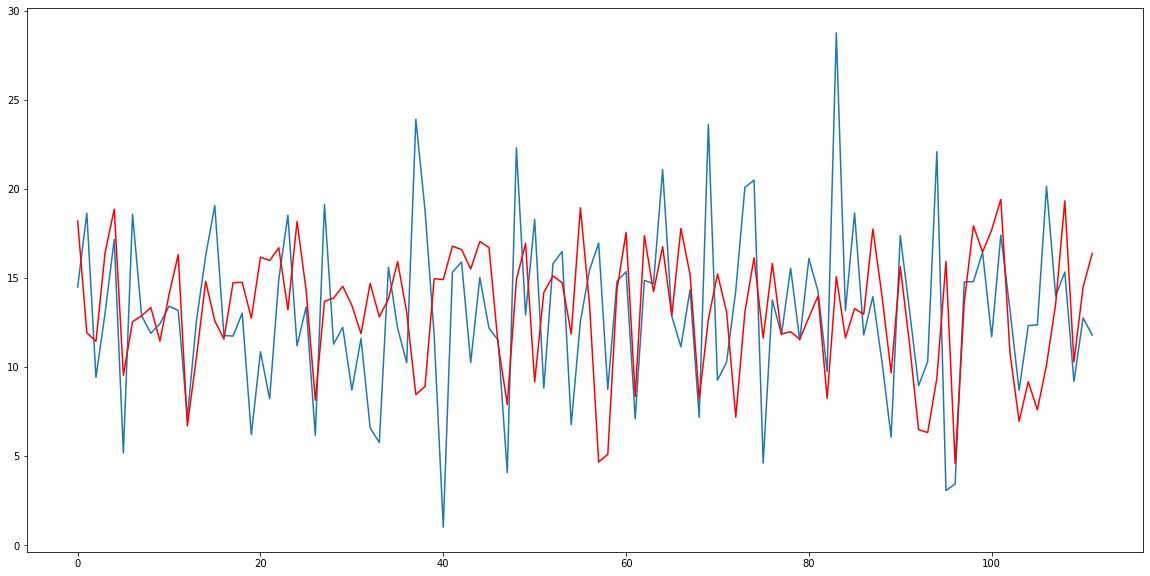

In [54]:
from matplotlib import pyplot
pyplot.figure(figsize=(20,10))
pyplot.plot(Ytest)
pyplot.plot(preds, 'r')
pyplot.show()

In [57]:
forecast1

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,date,actual_value,LSTM_1,ANN,DNN,CNN
0,0,0,0,2013-07-21,7.167,12.848727,12.621870,10.269232,6.703887
1,1,1,1,2013-07-22,12.635,13.069322,13.224121,12.461345,10.584531
2,2,2,2,2013-07-23,16.245,12.907010,12.730986,13.187437,14.829486
3,3,3,3,2013-07-24,19.078,12.777893,12.559135,12.664599,12.601462
4,4,4,4,2013-07-25,11.782,12.657943,12.643691,11.548706,11.584661
...,...,...,...,...,...,...,...,...,...
95,95,95,95,2013-10-24,13.996,12.645540,12.624360,11.123360,13.554761
96,96,96,96,2013-10-25,15.341,12.778797,12.423321,16.360193,19.339230
97,97,97,97,2013-10-26,9.206,12.755134,12.504543,13.325233,10.297752
98,98,98,98,2013-10-27,12.771,12.955511,13.108488,9.423138,14.501246


In [2]:
error = pd.DataFrame(columns=['File_name','RMSE_ERROR_CNN','RMSE_ERROR_LSTM','RMSE_ERROR_ARIMA','MSE','MAPE'])

In [64]:
error = pd.DataFrame(columns=['File_name','RMSE_ERROR_CNN','MSE','MAPE'])

In [60]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [6]:
dff=pd.read_csv("C:/Users/RAHAT/Downloads/Untitled Folder/Sales_f/LSTM_forecast_error.csv")

In [66]:
import os
import logging, sys
logging.disable(sys.maxsize)
from math import sqrt
paths_to_folders = ['C:/Users/RAHAT/Downloads/Untitled Folder/Sales_f/data/Splited Data s-1 to s-5/TEST']
x=0
for folder in paths_to_folders:
   for csv_file in os.listdir(folder):
        #if  any(dff.File_name ==""+csv_file)==True:
       #if len(df.index)>=100:
            #select_indices=list(np.where(dff["File_name"] == ''+csv_file)[0])
            #print(select_indices)
            df=pd.read_csv("C:/Users/RAHAT/Downloads/Untitled Folder/Sales_f/data/Splited Data s-1 to s-5/TEST/"+csv_file,parse_dates=['date'],index_col='date')
            df.drop(['id','store_nbr','item_nbr','onpromotion'], axis=1,inplace=True)
            df_1=df.values
            df_1=df_1.astype('float32')
            scaler = MinMaxScaler(feature_range=(-1,1))
            ts = scaler.fit_transform(df_1)
            timestep = int(len(df) * 0.2)
            print(timestep)
            X= []
            Y=[]
            raw_data=ts
            for i in range(len(raw_data)- (timestep)):
                X.append(raw_data[i:i+timestep])
                Y.append(raw_data[i+timestep])
            X=np.asanyarray(X)
            Y=np.asanyarray(Y)
            k = int(len(X) * 0.8)
            Xtrain = X[:k,:,:]  
            Ytrain = Y[:k]
            model = Sequential()
            model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(int(len(df) * 0.2), 1)))
            model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
            model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
            model.add(MaxPooling1D(pool_size=2))
            model.add(Flatten())
            model.add(Dense(100, activation='relu'))
            model.add(Dense(1))
            model.compile(optimizer='adam', loss='mse')
            # fit model
            model.fit(Xtrain, Ytrain, epochs=200, verbose=0)
            Xtest = X[k:,:,:]  
            Ytest= Y[k:] 
            preds = model.predict(Xtest)
            preds = scaler.inverse_transform(preds)
            Ytest=np.asanyarray(Ytest)  
            Ytest=Ytest.reshape(-1,1) 
            Ytest = scaler.inverse_transform(Ytest)
            Ytrain=np.asanyarray(Ytrain)  
            Ytrain=Ytrain.reshape(-1,1) 
            Ytrain = scaler.inverse_transform(Ytrain)
            rmse =np.sqrt(mean_squared_error(Ytest,preds))
            error.loc[x, ['File_name']]=csv_file
            error.loc[x, ['RMSE_ERROR_CNN']]=rmse
            #if len(select_indices)==1:
                #b=dff.iloc[select_indices[0]]['RMSE_ERROR_LSTM']
                #d=dff.iloc[select_indices[0]]['RMSE_ERROR_ARIMA']
                #error.loc[x, ['RMSE_ERROR_LSTM']]=b
                #error.loc[x, ['RMSE_ERROR_ARIMA']]=d
            error.loc[x, ['MSE']]=mean_squared_error(Ytest,preds)
            error.loc[x, ['MAPE']]=mean_absolute_percentage_error(Ytest,preds)
            x=x+1
            print(x+1)

35
2
35
3
32
4
35
5


In [67]:
error.head()

,File_name,RMSE_ERROR_CNN,MSE,MAPE
0,S_3__I_123601.csv,4.14369,17.1701,14.9109
1,S_3__I_264452.csv,6.4467,41.5599,49.986
2,S_4__I_168930.csv,9.75665,95.1922,90.6345
3,S_4__I_215352.csv,14.0954,198.68,84.8619


In [17]:
pp=error.sort_values('RMSE_ERROR_CNN',ascending=True)

In [19]:
error.to_csv("Forecast_Error_CNN.csv")

In [18]:
pp.head(30)

,File_name,RMSE_ERROR_CNN,RMSE_ERROR_LSTM,RMSE_ERROR_ARIMA,MSE,MAPE
40,S_1__I_368419.csv,0.667447,0.765411,0.723397,0.445486,36.7406
71,S_1__I_671699.csv,0.696202,0.434438,0.563262,0.484697,128.535
33,S_1__I_322095.csv,0.741797,0.988532,0.922497,0.550262,34.2308
55,S_1__I_457688.csv,0.831536,0.687168,0.862647,0.691452,36.2199
78,S_1__I_770453.csv,0.858077,0.882708,0.785753,0.736296,50.6266
49,S_1__I_414888.csv,0.877917,1.0913,1.27989,0.770739,58.1332
25,S_1__I_258395.csv,0.916577,0.769589,0.74994,0.840113,39.8237
19,S_1__I_177395.csv,0.952596,0.850571,1.03556,0.907439,66.8226
56,S_1__I_460804.csv,0.954462,0.867646,0.925437,0.910997,49.3245
64,S_1__I_578467.csv,0.961996,0.89219,0.977545,0.925436,74.3539


In [20]:
pp=pd.read_csv("C:/Users/RAHAT/Downloads/Untitled Folder/Sales_f/prophet_forecast_error.csv")

In [22]:
pp=pp.sort_values('RMSE_ERROR',ascending=True)

In [25]:
pp.head(50)

,Unnamed: 0,File_name,RMSE_ERROR,MSE,MAPE
653,653,S_1__I_671699.csv,0.450330,0.202798,74.214999
404,404,S_1__I_368419.csv,0.740652,0.548565,38.155250
406,406,S_1__I_368624.csv,0.748579,0.560370,44.279835
278,278,S_1__I_258395.csv,0.765397,0.585833,36.095084
756,756,S_1__I_812725.csv,0.769112,0.591533,48.330318
221,221,S_1__I_177395.csv,0.780320,0.608899,43.592390
476,476,S_1__I_460804.csv,0.790498,0.624887,46.167612
918,918,S_1__I_949297.csv,0.803618,0.645801,49.266429
311,311,S_1__I_279137.csv,0.828547,0.686490,37.652879
390,390,S_1__I_363889.csv,0.837055,0.700662,43.113229


In [10]:
def series_to_supervised(data, window=1, lag=1, dropnan=True):
    cols, names = list(), list()
    # Input sequence (t-n, ... t-1)
    for i in range(window, 0, -1):
        cols.append(data.shift(i))
        names += [('%s(t-%d)' % (col, i)) for col in data.columns]
    # Current timestep (t=0)
    cols.append(data)
    names += [('%s(t)' % (col)) for col in data.columns]
    # Target timestep (t=lag)
    cols.append(data.shift(-lag))
    names += [('%s(t+%d)' % (col, lag)) for col in data.columns]
    # Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
reframed_data = series_to_supervised(df, 1, 1)

In [ ]:
reframed_data.head()

In [ ]:
values = reframed_data.values
train_index =int(len(reframed_data.index) * 0.8) #The logic is to have 500 days worth of training data. this could also be a hyperparameter that can be tuned.
train = values[:train_index, :]
test = values[train_index:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

In [ ]:
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=2, activation='relu',input_shape=(train_X.shape[1], train_X.shape[2])))
#model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
#model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(train_X, train_y, epochs=40, verbose=1)
# summarize history for loss


In [11]:
def series_to_supervised(data, window=1, lag=1, dropnan=True):
    cols, names = list(), list()
    # Input sequence (t-n, ... t-1)
    for i in range(window, 0, -1):
        cols.append(data.shift(i))
        names += [('%s(t-%d)' % (col, i)) for col in data.columns]
    # Current timestep (t=0)
    cols.append(data)
    names += [('%s(t)' % (col)) for col in data.columns]
    # Target timestep (t=lag)
    cols.append(data.shift(-lag))
    names += [('%s(t+%d)' % (col, lag)) for col in data.columns]
    # Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [12]:
df= pd.read_csv("C:/Users/RAHAT/Downloads/Untitled Folder/Sales_f/data/Splited Data s-1 to s-5/STORE__3/S_3__I_114790.csv",parse_dates=['date'])
df.drop(['id','store_nbr','item_nbr','onpromotion'], axis=1,inplace=True)
#convert date field from string to datetime
#df['date'] = pd.to_datetime(df['date'])

In [13]:
k = int(len(df) * 0.8)
train = df[:k]  
test= df[k:]

In [14]:
lag_size = (test['date'].max().date() - train['date'].max().date()).days

In [15]:
lag_size

35

In [16]:
window =29
lag = lag_size

series = series_to_supervised(train.drop('date', axis=1), window=window, lag=lag)
series.head()

,unit_sales(t-29),unit_sales(t-28),unit_sales(t-27),unit_sales(t-26),unit_sales(t-25),unit_sales(t-24),unit_sales(t-23),unit_sales(t-22),unit_sales(t-21),unit_sales(t-20),...,unit_sales(t-8),unit_sales(t-7),unit_sales(t-6),unit_sales(t-5),unit_sales(t-4),unit_sales(t-3),unit_sales(t-2),unit_sales(t-1),unit_sales(t),unit_sales(t+35)
29,27.0,19.0,25.0,34.0,38.0,28.0,11.0,13.0,16.0,15.0,...,17.0,14.0,17.0,18.0,37.0,13.0,16.0,20.0,18.0,17.0
30,19.0,25.0,34.0,38.0,28.0,11.0,13.0,16.0,15.0,20.0,...,14.0,17.0,18.0,37.0,13.0,16.0,20.0,18.0,18.0,19.0
31,25.0,34.0,38.0,28.0,11.0,13.0,16.0,15.0,20.0,28.0,...,17.0,18.0,37.0,13.0,16.0,20.0,18.0,18.0,33.0,38.0
32,34.0,38.0,28.0,11.0,13.0,16.0,15.0,20.0,28.0,16.0,...,18.0,37.0,13.0,16.0,20.0,18.0,18.0,33.0,36.0,35.0
33,38.0,28.0,11.0,13.0,16.0,15.0,20.0,28.0,16.0,14.0,...,37.0,13.0,16.0,20.0,18.0,18.0,33.0,36.0,31.0,23.0


In [178]:
len(series)

76

In [17]:
from sklearn.model_selection import train_test_split
labels_col = 'unit_sales(t+%d)' % lag
labels = series[labels_col]
series = series.drop(labels_col, axis=1)

X_train, X_valid, Y_train, Y_valid = train_test_split(series, labels.values, test_size=0.2, random_state=0)
print('Train set shape', X_train.shape)
print('Validation set shape', X_valid.shape)
X_train.head()

Train set shape (53, 30)
Validation set shape (23, 30)


,unit_sales(t-29),unit_sales(t-28),unit_sales(t-27),unit_sales(t-26),unit_sales(t-25),unit_sales(t-24),unit_sales(t-23),unit_sales(t-22),unit_sales(t-21),unit_sales(t-20),...,unit_sales(t-9),unit_sales(t-8),unit_sales(t-7),unit_sales(t-6),unit_sales(t-5),unit_sales(t-4),unit_sales(t-3),unit_sales(t-2),unit_sales(t-1),unit_sales(t)
33,38.0,28.0,11.0,13.0,16.0,15.0,20.0,28.0,16.0,14.0,...,18.0,37.0,13.0,16.0,20.0,18.0,18.0,33.0,36.0,31.0
95,38.0,35.0,23.0,20.0,20.0,11.0,29.0,33.0,63.0,16.0,...,20.0,25.0,34.0,28.0,23.0,22.0,22.0,17.0,33.0,34.0
77,28.0,29.0,19.0,18.0,28.0,19.0,11.0,16.0,16.0,14.0,...,23.0,20.0,20.0,11.0,29.0,33.0,63.0,16.0,18.0,36.0
31,25.0,34.0,38.0,28.0,11.0,13.0,16.0,15.0,20.0,28.0,...,14.0,17.0,18.0,37.0,13.0,16.0,20.0,18.0,18.0,33.0
74,30.0,26.0,22.0,28.0,29.0,19.0,18.0,28.0,19.0,11.0,...,19.0,38.0,35.0,23.0,20.0,20.0,11.0,29.0,33.0,63.0


In [18]:
X_train_series = X_train.values.reshape((X_train.shape[0], X_train.shape[1],1))
X_valid_series = X_valid.values.reshape((X_valid.shape[0], X_valid.shape[1],1))
print('Train set shape', X_train_series.shape)
print('Validation set shape', X_valid_series.shape)

Train set shape (53, 30, 1)
Validation set shape (23, 30, 1)


In [19]:
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
model_cnn.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(loss='mse', optimizer='adam')

In [20]:
cnn_history = model_cnn.fit(X_train_series, Y_train, validation_data=(X_valid_series, Y_valid), epochs=40, verbose=2)


Train on 53 samples, validate on 23 samples
Epoch 1/40
 - 0s - loss: 618.3473 - val_loss: 108.2634
Epoch 2/40
 - 0s - loss: 185.5320 - val_loss: 90.3670
Epoch 3/40
 - 0s - loss: 95.6994 - val_loss: 268.4849
Epoch 4/40
 - 0s - loss: 180.1153 - val_loss: 214.8526
Epoch 5/40
 - 0s - loss: 130.4699 - val_loss: 93.1022
Epoch 6/40
 - 0s - loss: 80.6417 - val_loss: 52.7534
Epoch 7/40
 - 0s - loss: 93.9226 - val_loss: 51.5441
Epoch 8/40
 - 0s - loss: 112.4642 - val_loss: 51.8547
Epoch 9/40
 - 0s - loss: 110.9573 - val_loss: 49.5887
Epoch 10/40
 - 0s - loss: 94.2258 - val_loss: 56.7081
Epoch 11/40
 - 0s - loss: 77.8359 - val_loss: 81.7080
Epoch 12/40
 - 0s - loss: 82.2800 - val_loss: 114.3831
Epoch 13/40
 - 0s - loss: 90.4954 - val_loss: 119.1008
Epoch 14/40
 - 0s - loss: 90.8404 - val_loss: 99.2324
Epoch 15/40
 - 0s - loss: 82.9390 - val_loss: 71.1913
Epoch 16/40
 - 0s - loss: 76.3626 - val_loss: 56.0343
Epoch 17/40
 - 0s - loss: 77.9131 - val_loss: 50.6668
Epoch 18/40
 - 0s - loss: 80.4659 -

In [21]:
cnn_train_pred = model_cnn.predict(X_train_series)
cnn_valid_pred = model_cnn.predict(X_valid_series)
print('Train rmse:',np.sqrt(mean_squared_error(Y_train, cnn_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, cnn_valid_pred)))

Train rmse: 7.617763017884814
Validation rmse: 7.000755804249676


In [46]:
subsequences = 2
timesteps = X_train_series.shape[1]//subsequences
X_train_series_sub = X_train_series.reshape((X_train_series.shape[0], subsequences, timesteps, 1))
X_valid_series_sub = X_valid_series.reshape((X_valid_series.shape[0], subsequences, timesteps, 1))
print('Train set shape', X_train_series_sub.shape)

print('Validation set shape', X_valid_series_sub.shape)

Train set shape (53, 2, 15, 1)
Validation set shape (23, 2, 15, 1)


In [47]:
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten

In [48]:
model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, X_train_series_sub.shape[2], X_train_series_sub.shape[3])))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(LSTM(50, activation='relu'))
#model_cnn_lstm.add(LSTM(10, stateful=True))
model_cnn_lstm.add(Dense(1))
model_cnn_lstm.compile(loss='mse', optimizer='adam')

In [49]:
cnn_lstm_history = model_cnn_lstm.fit(X_train_series_sub, Y_train, validation_data=(X_valid_series_sub, Y_valid), epochs=60, verbose=2)

Train on 53 samples, validate on 23 samples
Epoch 1/60
 - 1s - loss: 323.5760 - val_loss: 58.0916
Epoch 2/60
 - 0s - loss: 119.1354 - val_loss: 183.2845
Epoch 3/60
 - 0s - loss: 126.7831 - val_loss: 153.0984
Epoch 4/60
 - 0s - loss: 105.6784 - val_loss: 86.1249
Epoch 5/60
 - 0s - loss: 87.1095 - val_loss: 57.8868
Epoch 6/60
 - 0s - loss: 85.3908 - val_loss: 52.4730
Epoch 7/60
 - 0s - loss: 89.2206 - val_loss: 52.3646
Epoch 8/60
 - 0s - loss: 87.1358 - val_loss: 58.4075
Epoch 9/60
 - 0s - loss: 81.6423 - val_loss: 68.9888
Epoch 10/60
 - 0s - loss: 79.5151 - val_loss: 78.9785
Epoch 11/60
 - 0s - loss: 81.1092 - val_loss: 83.0930
Epoch 12/60
 - 0s - loss: 81.4763 - val_loss: 76.8843
Epoch 13/60
 - 0s - loss: 79.2663 - val_loss: 68.7020
Epoch 14/60
 - 0s - loss: 80.1508 - val_loss: 59.4050
Epoch 15/60
 - 0s - loss: 77.6691 - val_loss: 57.2689
Epoch 16/60
 - 0s - loss: 77.2264 - val_loss: 57.7302
Epoch 17/60
 - 0s - loss: 76.3628 - val_loss: 59.4058
Epoch 18/60
 - 0s - loss: 76.2719 - val_l

In [45]:
cnn_train_pred = model_cnn_lstm.predict(X_train_series_sub)
cnn_valid_pred = model_cnn_lstm.predict(X_valid_series_sub)
print('Train rmse:',np.sqrt(mean_squared_error(Y_train, cnn_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, cnn_valid_pred)))

Train rmse: 8.356465723359564
Validation rmse: 7.161033306617066


In [52]:
Y_train.size

53

In [53]:
cnn_train_pred.size

53

In [54]:
Y_valid


array([34., 20., 20., 20., 22., 23., 30., 15., 20., 11., 17., 38., 18.,
       30., 27., 14., 22., 11., 13., 21., 20., 11., 16.])

In [55]:
cnn_valid_pred

array([[32.31676 ],
       [26.15213 ],
       [20.172178],
       [23.057985],
       [22.003666],
       [21.590473],
       [26.111317],
       [22.49208 ],
       [19.862751],
       [18.837688],
       [26.013788],
       [33.86803 ],
       [20.818521],
       [21.391003],
       [21.733185],
       [27.51749 ],
       [20.971619],
       [22.530863],
       [24.024178],
       [26.071173],
       [17.646019],
       [26.766785],
       [24.273779]], dtype=float32)